In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, shutil
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline
import tensorflow as tf
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
gliomaDir = "../dataset/Training/glioma/"
gliomaList = os.listdir(gliomaDir)
gliomaSize = len(gliomaList)

meningiomaDir = "../dataset/Training/meningioma/"
meningiomaList = os.listdir(meningiomaDir)
meningiomaSize = len(meningiomaList)

notumorDir = "../dataset/Training/notumor/"
notumorList = os.listdir(notumorDir)
notumorSize = len(notumorList)

pituitaryDir = "../dataset/Training/pituitary/"
pituitaryList = os.listdir(pituitaryDir)
pituitarySize = len(pituitaryList)

print (f"Glioma num is : "    ,gliomaSize)               
print (f"Meningioma num is : ",meningiomaSize)               
print (f"Notumor num is : "   ,notumorSize)               
print (f"Pituitary num is : " ,pituitarySize)               

Glioma num is :  1321
Meningioma num is :  1339
Notumor num is :  1595
Pituitary num is :  1457


Text(0.5, 1.0, 'Count of Brain Tumor Images')

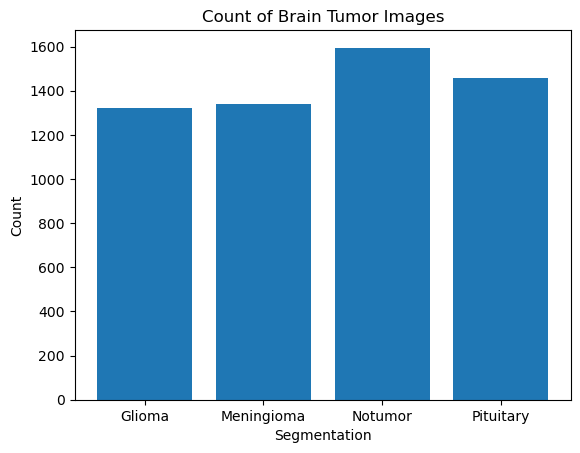

In [3]:
data = {'Glioma':gliomaSize,'Meningioma':meningiomaSize,'Notumor':notumorSize,'Pituitary':pituitarySize}
plt.bar(data.keys(),data.values())
plt.xlabel('Segmentation')
plt.ylabel('Count')
plt.title("Count of Brain Tumor Images")

In [4]:
### The data are balanced to some extent, but for parctice, let us make data augmentation

In [5]:
def timing(sec_elapsed):
    h = int(sec_elapsed / (60*60))
    m = int(sec_elapsed % (60*60) / 60)
    s = sec_elapsed % 60
    return f"{h}:{m}:{s}"

In [24]:
def dataAugmentation(directory,numberOfnewImages,newname,initialNumber):
    generator = ImageDataGenerator(rotation_range=10, width_shift_range=0.1,height_shift_range=0.1,shear_range=0.1,
                                   brightness_range=(0.3, 1.0),horizontal_flip=True,vertical_flip=True,fill_mode='nearest')
    counter = 0;
    number = int(initialNumber)
    for imageName in os.listdir(directory):
        #read the image
        image = cv2.imread(directory + '/' + imageName)
        image = image.reshape((1,) + image.shape) # Reshape the image to a format compatible with Keras 
        save_prefix  = newname + str(number)
        # print(newname)
        # print(number)
        # print(save_prefix)
        # print('----------')
        for batch in generator.flow(x = image, batch_size = 1, save_to_dir = directory, save_prefix = save_prefix, save_format = "jpg"):
            break
        counter+=1
        number+=1
        if(counter>=numberOfnewImages):
            break


In [25]:
# dataAugmentation(gliomaDir,200,'Tr-gl_',gliomaSize)
# dataAugmentation(meningiomaDir,200,'Tr-me_',meningiomaSize)
# dataAugmentation(pituitaryDir,100,'Tr-pi_',pituitarySize)

TypeError: ImageDataGenerator.flow() got an unexpected keyword argument 'save'